In [1]:
from numpy import array,mean

In [2]:
x=array([1,2,3,4,5])
y=array([3,15,7,19,11])

In [3]:
def lin(dx,dy):
    m=((mean(dx)*mean(dy))-(mean(dx*dy)))/((mean(dx)**2)-(mean(dx**2)))
    c=mean(dy)-m*mean(dx)
    return m,c
lin(x,y)

(2.0, 5.0)

In [4]:
m,c=lin(x,y)
ry=[i*m+c for i in x]
ry

[7.0, 9.0, 11.0, 13.0, 15.0]

In [5]:
def coeffd(ry,y):
    sqery=mean(sum((ry-y)**2))
    sqemy=mean(sum((mean(y)-y)**2))
    return 1-(sqery/sqemy)
coeffd(ry,y)

0.25

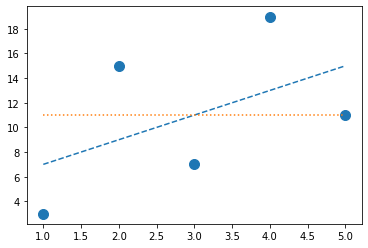

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x,y,s=100)
plt.plot(x,ry,'--')
plt.plot(x,[mean(y) for i in x],':')

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
algo=LinearRegression()

In [9]:
algo.fit(x.reshape(-1,1),y.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
algo.score(x.reshape(-1,1),y.reshape(-1,1))

0.2500000000000001

In [11]:
algo.coef_,algo.intercept_,lin(x,y)

(array([[2.]]), array([5.]), (2.0, 5.0))

**Linear regression with data**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
USAhousing=pd.read_csv('USA_Housing.csv')

In [14]:
USAhousing

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [15]:
x=np.array([1,2,3,4,5])

In [16]:
y=np.array([3,2,1,4,3])

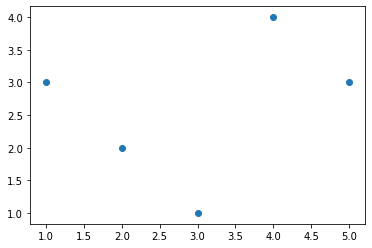

In [17]:
plt.scatter(x,y)

In [18]:
mean(x)

3.0

In [19]:
mean(y)

2.6

In [20]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [21]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [22]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [23]:
x=USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y=USAhousing[["Price"]]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=101)

**Creating model and training it**

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lm=LinearRegression()

In [28]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Model Evaluation**

In [29]:
print(lm.intercept_)

[-2640159.7968527]


In [30]:
print(lm.coef_)


[[2.15282755e+01 1.64883282e+05 1.22368678e+05 2.23380186e+03
  1.51504200e+01]]


In [31]:
print(x.columns)

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')


**prediction**

In [32]:
predict=lm.predict(x_test)

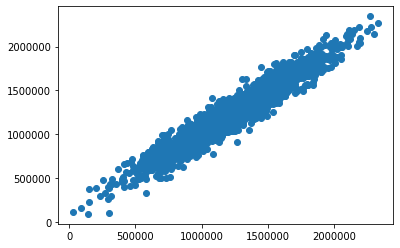

In [33]:
plt.scatter(y_test,predict)

ValueError: x and y must be the same size

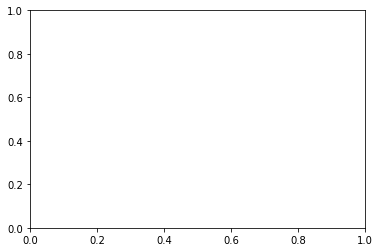

In [34]:
plt.scatter(x,y)

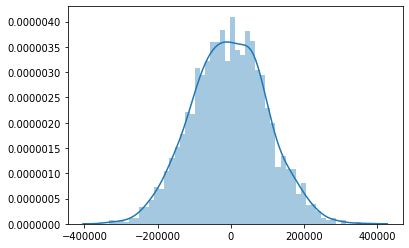

In [35]:
sns.distplot(y_test-predict,bins=50)

In [36]:
from sklearn import metrics

In [37]:
print('MAE:',metrics.mean_absolute_error(y_test,predict))
print('MSE:',metrics.mean_squared_error(y_test,predict))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predict)))

MAE: 82288.22251914945
MSE: 10460958907.208984
RMSE: 102278.829222909


In [39]:
lm.predict([[12000,12500,3600000,26589,12540]])

array([[4.42645485e+11]])